In [10]:
import numpy as np
import sklearn as sl
import csv
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

# 1. Dataset loading

## Loading

In [11]:
def load(path):
    with open(path, 'r') as f:
        data = []
        reader = csv.reader(f, delimiter=',')
        t = False
        for l in reader:
            if len(l) > 0 and l[0] == "@data":
                t = True
                continue
            if t:
                d = []
                for v in l:
                    d.append(float(v))
                data.append(d)
        data = np.array(data)
        return data[:, 0:-1], data[:, -1]

### Test loading

In [12]:
x, y = load('../../res/noiseless_data/noiseless_all_testing_9class.arff')
print(x.shape)
print(y.shape)

(33334, 50)
(33334,)


## Utils

In [39]:
from sklearn.decomposition import PCA
import os

out_dir = '.ignore'

def plot_dataset(x,y):
    pca = PCA(n_components=2)
    x_d = pca.fit_transform(x)
    plt.axis('equal')
    plt.scatter(x_d[:,0], x_d[:,1], c=y, marker='2')
    
def plot_ranges(x,y):
    t_min = np.amin(x, axis=0)
    t_max = np.amax(x, axis=0)
    plt.fill_between(range(t_min.shape[0]), t_min, t_max, facecolor='blue')
    ax = plt.gca()
    ax.grid(True)
    
def plot_class_dist(x,y):
    ctr = Counter(y)
    #plt.hist(y, bins=len(ctr), facecolor='blue', histtype=u'step', normed=False)
    plt.fill_between(range(len(ctr)), [0]*len(ctr), [ctr[c] for c in sorted(list(ctr))], facecolor='blue')
    print(ctr)
    
def analyse_dataset(x, y, plt_ranges=True, plt_classes=True, plt_instances=True):
    fig1 = plt.figure(figsize=(15,15))
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 4])
    
    if plt_ranges:
        plt.subplot(gs[0,0])
        plt.title("Ranges of inputs")
        plot_ranges(x,y)
    
    if plt_classes:
        plt.subplot(gs[0,1])
        plt.title("Class distribution")
        plot_class_dist(x,y)
    
    if plt_instances:
        plt.subplot(gs[1,:])
        plt.title("Instances")
        plot_dataset(train_x, train_y)
        
        print("Instances:", len(x))
        
    return fig1

def save_plot(figure, name):
    figure.savefig(name, bbox='tight')
    
def save_graph(dataset, f, filename):
    plt.figure()
    x, y = load(dataset)
    f(x,y)
    plt.savefig(os.path.join(out_dir, filename), bbox='tight')
    
def save_all(dataset, file_prefix):
    save_graph(dataset, plot_dataset, file_prefix + '_instances.pdf')
    save_graph(dataset, plot_ranges, file_prefix + '_inputs.pdf')
    save_graph(dataset, plot_class_dist, file_prefix + '_outputs.pdf')

## Available datasets

In [14]:
noiseless_9class_train = '../../res/noiseless_data/noiseless_all_training_9class.arff'
noiseless_9class_test = '../../res/noiseless_data/noiseless_all_testing_9class.arff'
noiseless_256class_train = '../../res/noiseless_data/noiseless_all_training_256class.arff'
noiseless_256class_test = '../../res/noiseless_data/noiseless_all_testing_256class.arff'

noisy_9class_train = '../../res/noisy_data/noisy_all_training_9class.arff'
noisy_9class_test = '../../res/noisy_data/noisy_all_testing_9class.arff'
noisy_256class_train = '../../res/noisy_data/noisy_all_training_256class.arff'
noisy_256class_test = '../../res/noisy_data/noisy_all_testing_256class.arff'

## Store graphs

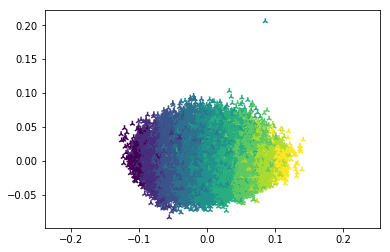

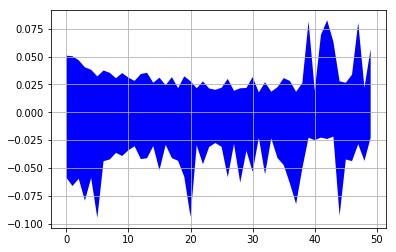

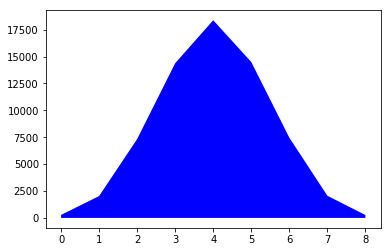

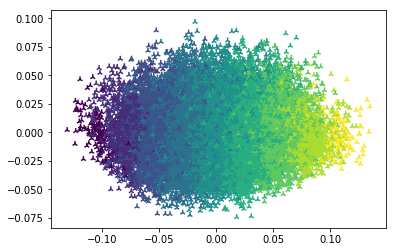

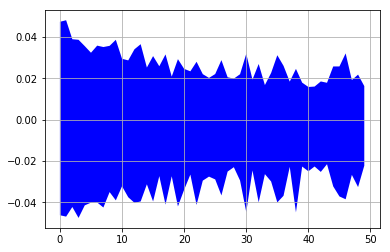

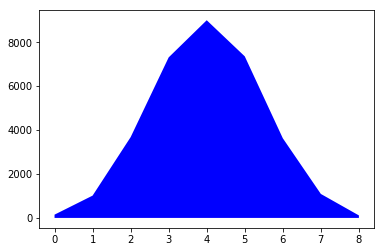

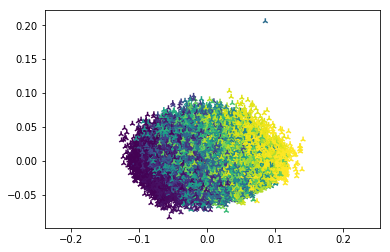

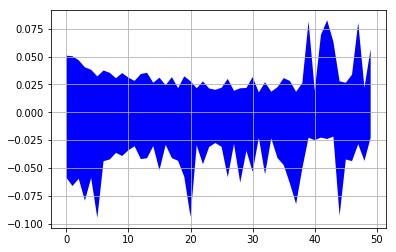

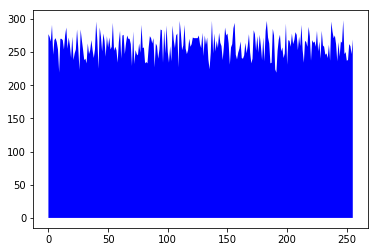

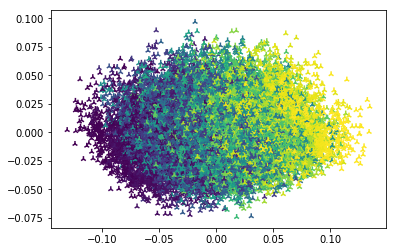

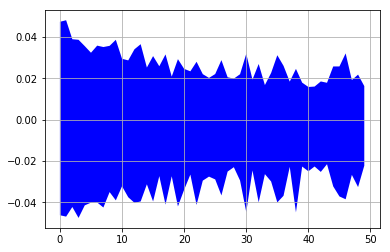

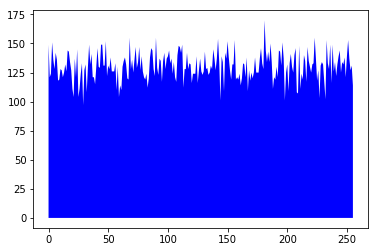

In [36]:
save_all(noiseless_9class_train, 'nl9_tr')
save_all(noiseless_9class_test, 'nl9_ts')

save_all(noiseless_256class_train, 'nl256_tr')
save_all(noiseless_256class_test, 'nl256_ts')

# 2. Noiseless

##  2.1 Noiseless - Hamming distance (9 class)

### Train

In [37]:
train_x, train_y = load(noiseless_9class_train)

Counter({4.0: 18373, 5.0: 14492, 3.0: 14379, 6.0: 7458, 2.0: 7328, 7.0: 2060, 1.0: 2030, 0.0: 277, 8.0: 269})
Instances: 66666


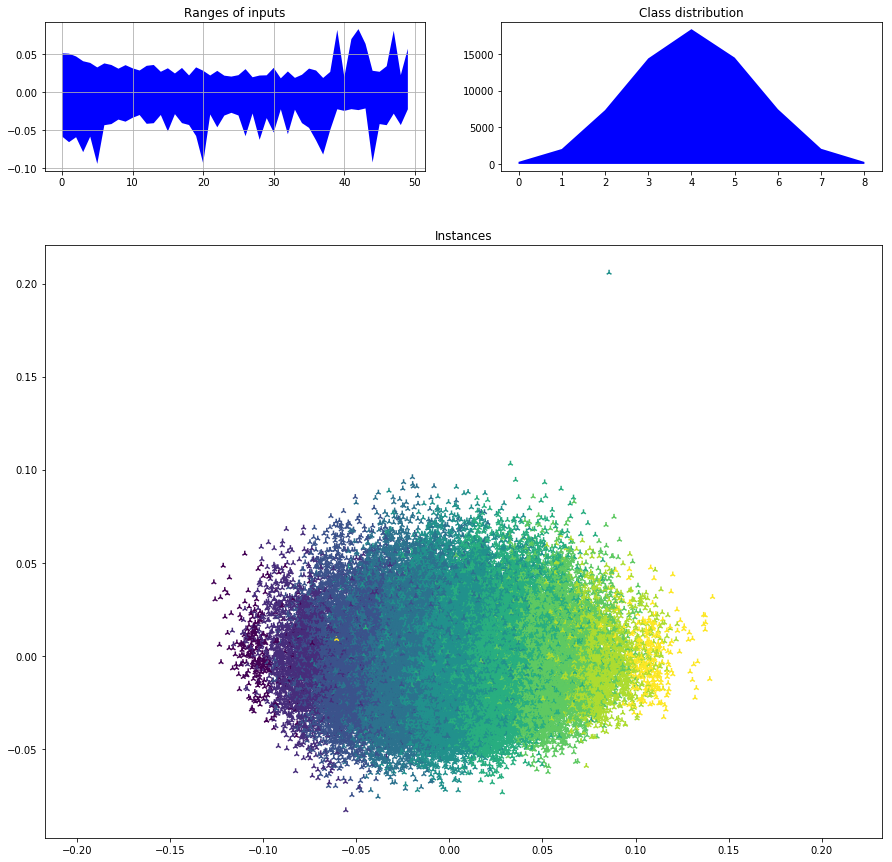

In [40]:
f = analyse_dataset(train_x, train_y)
#save_plot(f, "image.pdf")

### Test

In [19]:
test_x, test_y = load(noiseless_9class_test)

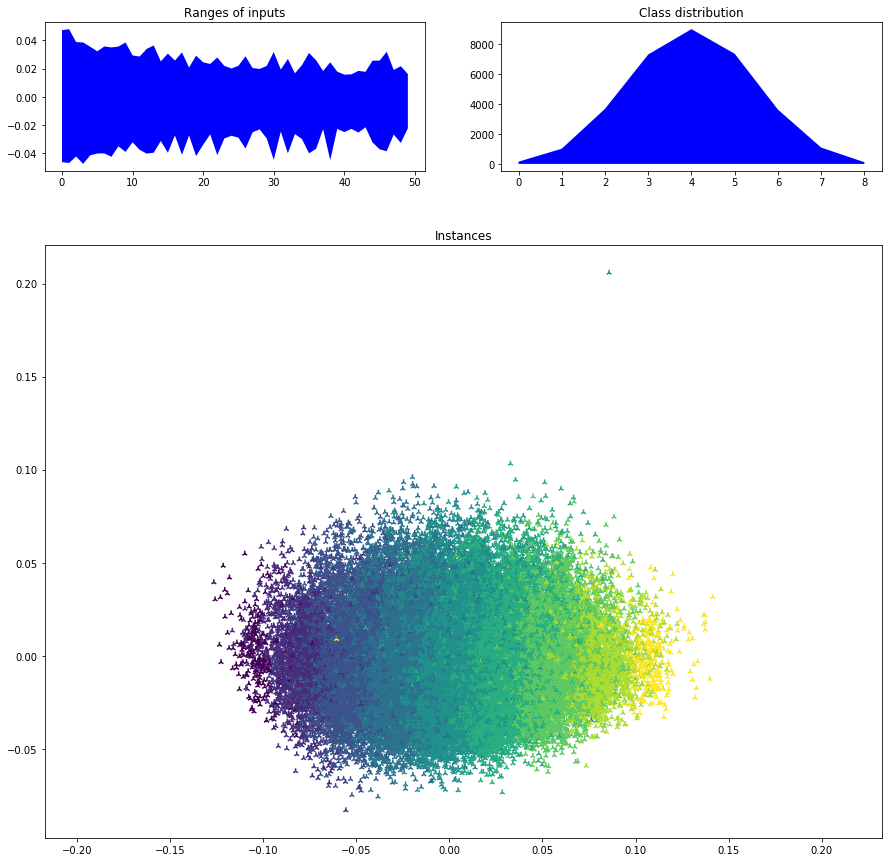

Instances: 33334


In [20]:
f = analyse_dataset(test_x, test_y)

### Joined

In [21]:
X = np.vstack([train_x, test_x])
Y = np.concatenate([train_y, test_y])

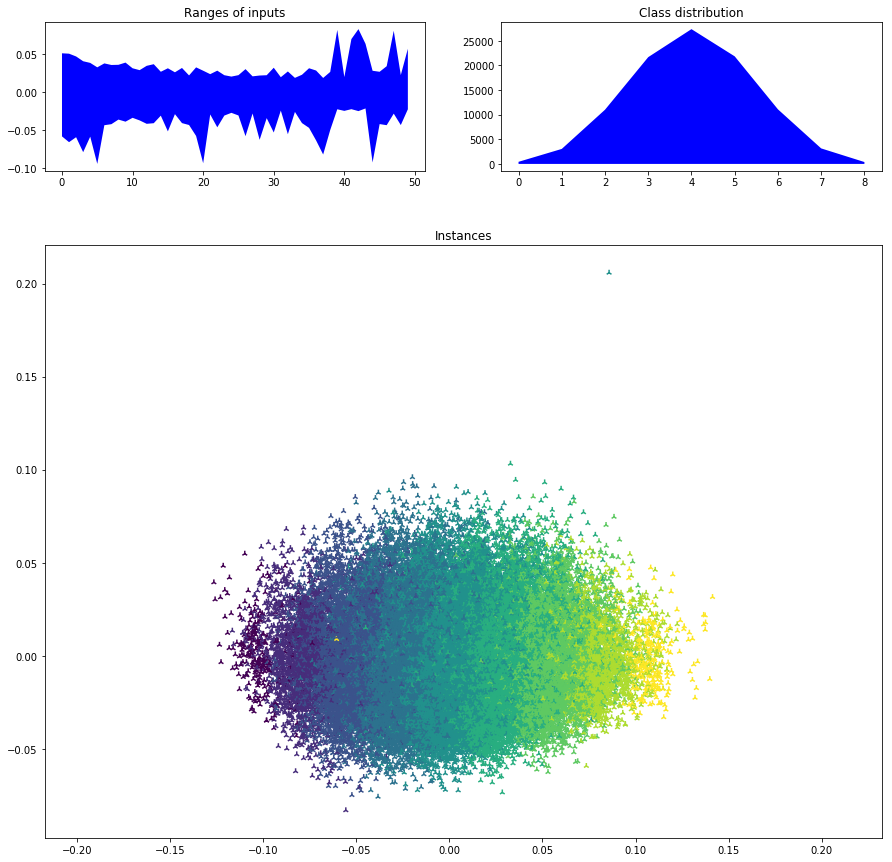

Instances: 100000


In [22]:
f = analyse_dataset(X, Y)

## 2.2 Noiseless - Original byte (256 class)

### Train

In [82]:
train_x, train_y = load(noiseless_256class_train)

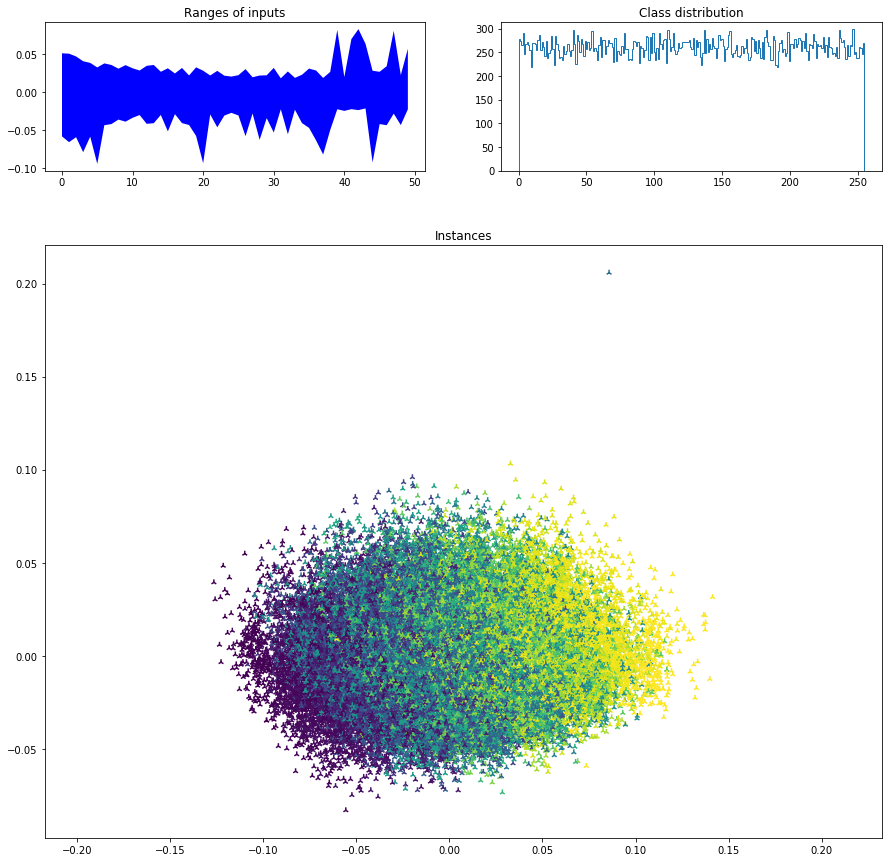

Instances: 66666


In [83]:
f = analyse_dataset(train_x, train_y)

### Test

In [84]:
test_x, test_y = load(noiseless_256class_test)

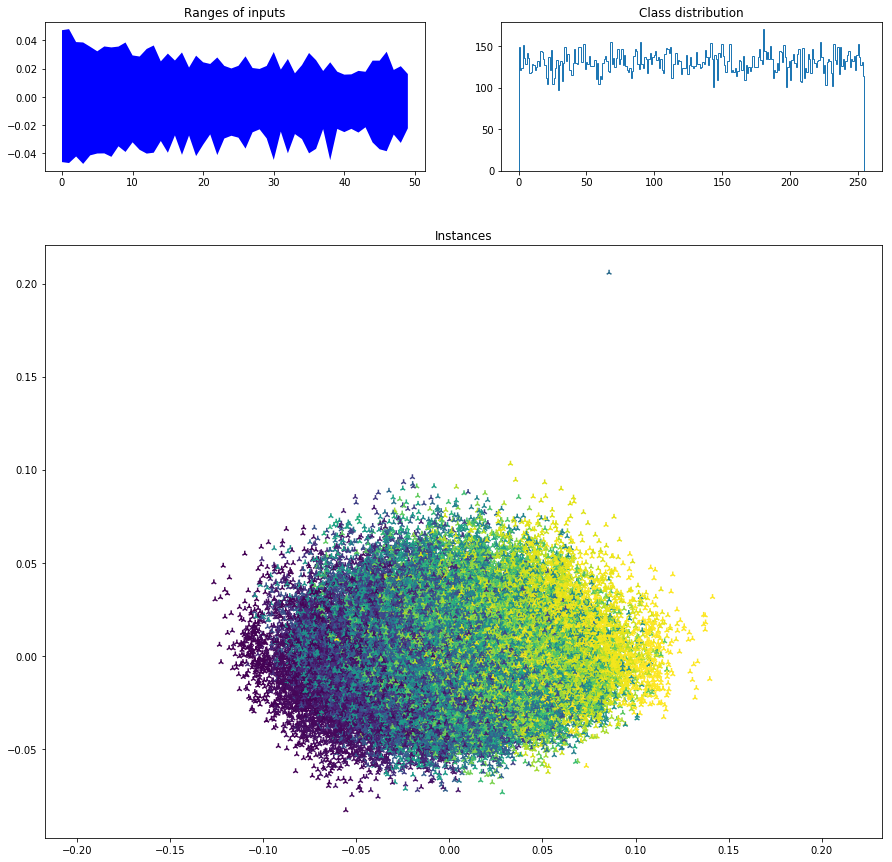

Instances: 33334


In [85]:
f = analyse_dataset(test_x, test_y)

### Joined

In [86]:
X = np.vstack([train_x, test_x])
Y = np.concatenate([train_y, test_y])

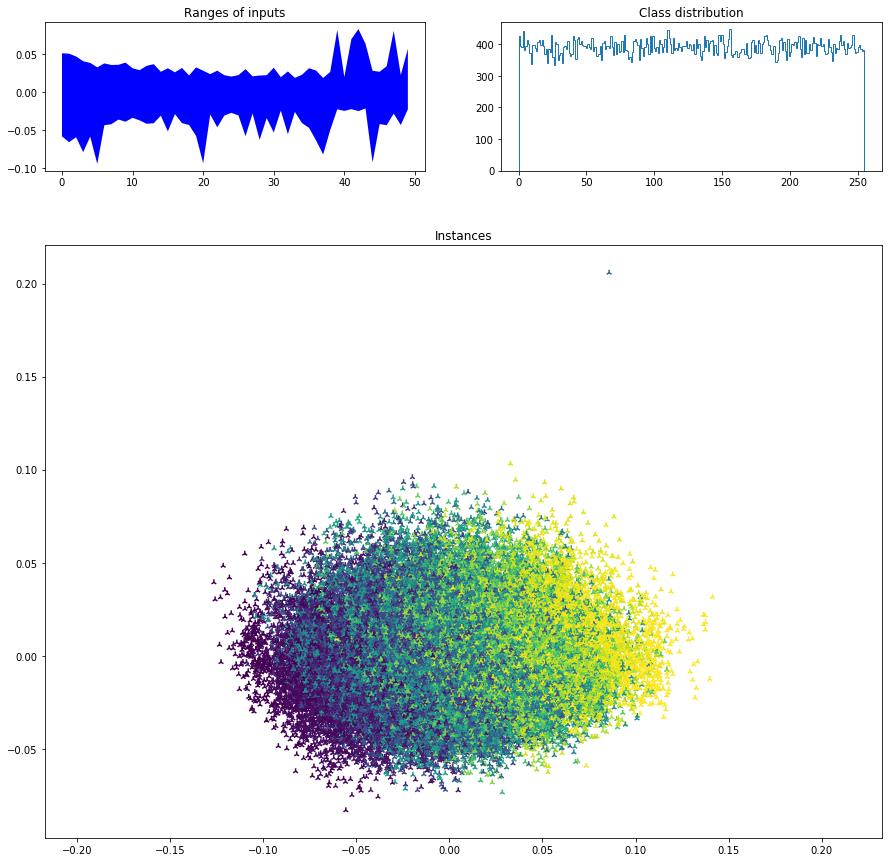

Instances: 100000


In [87]:
f = analyse_dataset(X, Y)

# 3. Noisy

## 3.1 Noisy - Hamming distance (9 class)

### Train

In [88]:
train_x, train_y = load(noisy_9class_train)

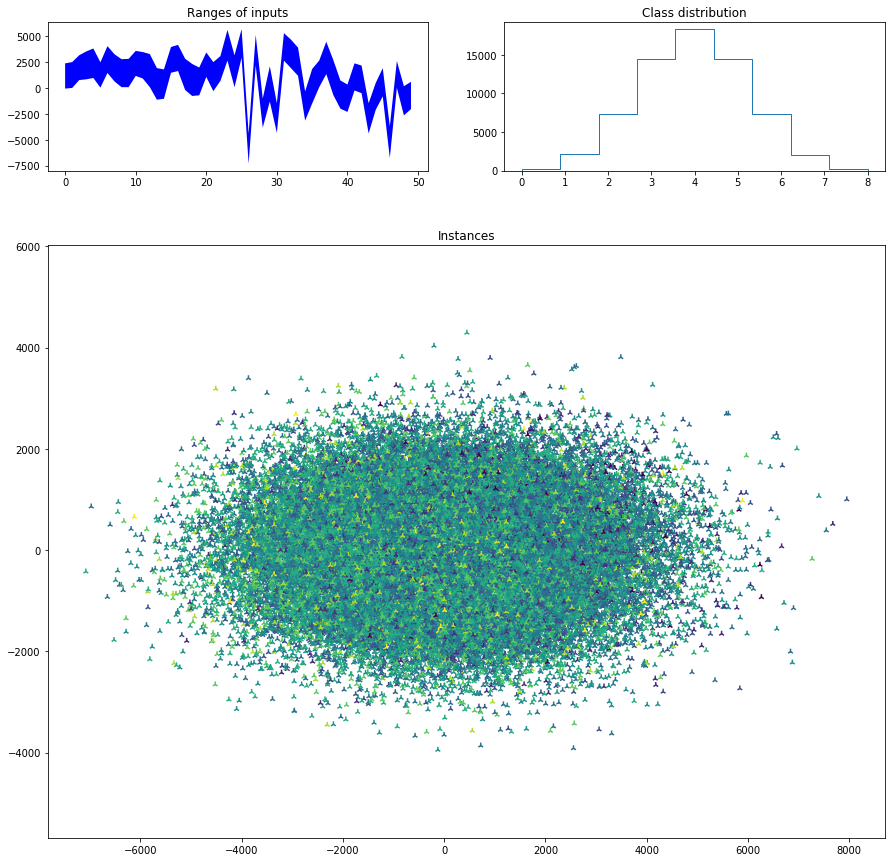

Instances: 66666


In [89]:
f = analyse_dataset(train_x, train_y)

### Test

In [90]:
test_x, test_y = load(noisy_9class_test)

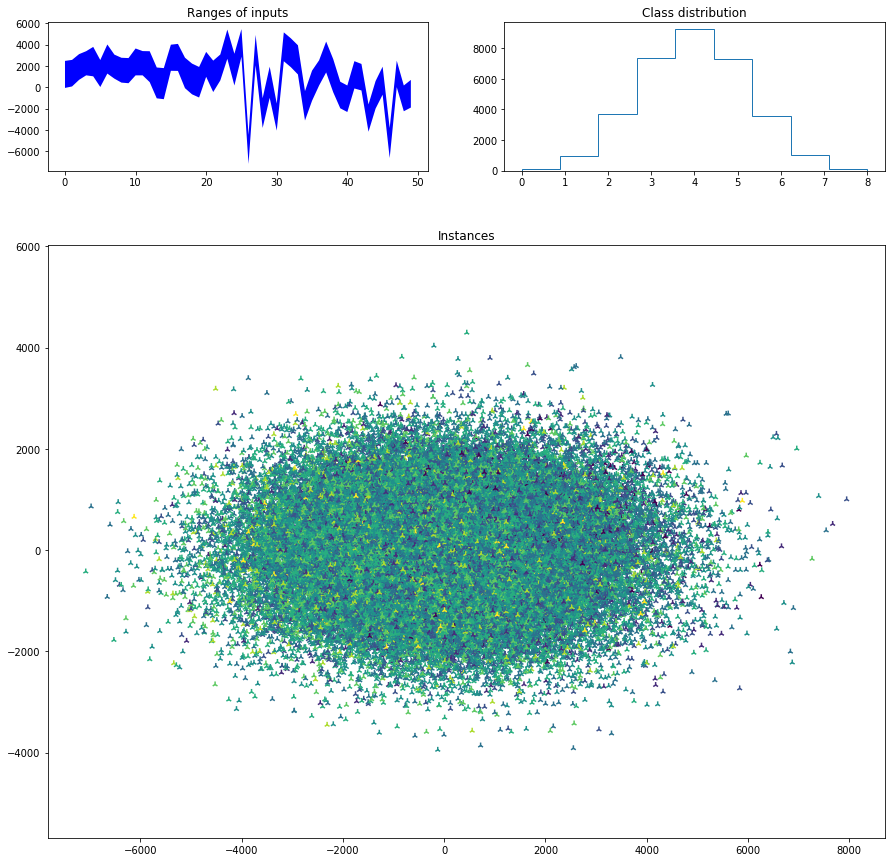

Instances: 33334


In [91]:
f = analyse_dataset(test_x, test_y)

### Joined

In [92]:
X = np.vstack([train_x, test_x])
Y = np.concatenate([train_y, test_y])

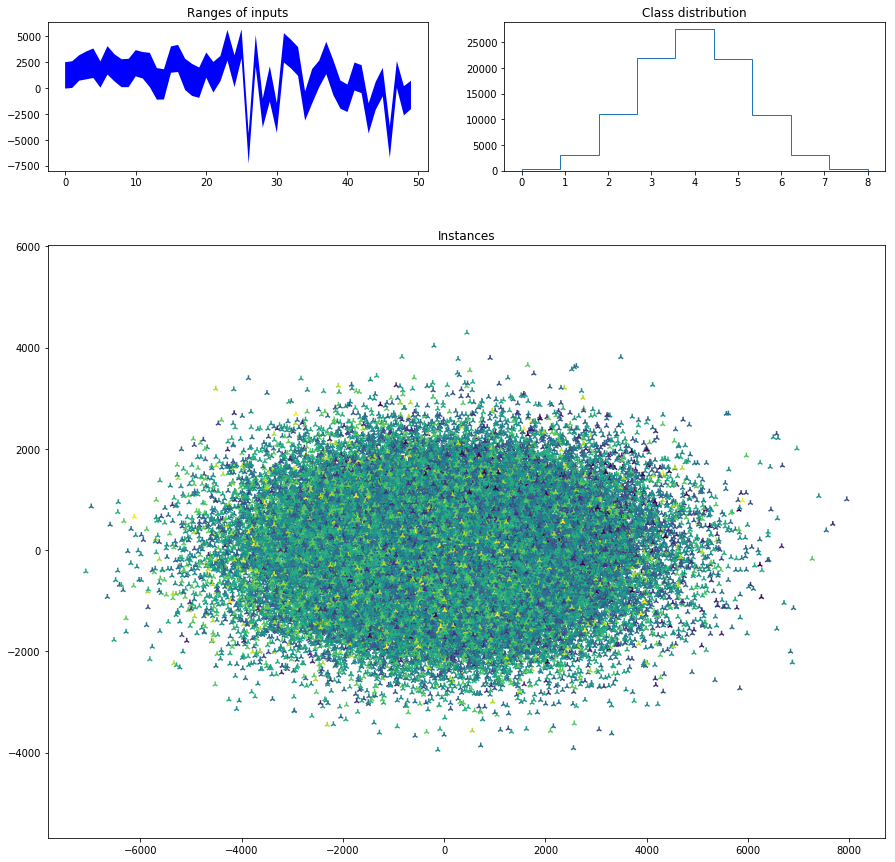

Instances: 100000


In [93]:
f = analyse_dataset(X, Y)

## 3.2 Noisy - Original byte (256 class)

### Train

In [94]:
train_x, train_y = load(noisy_256class_train)

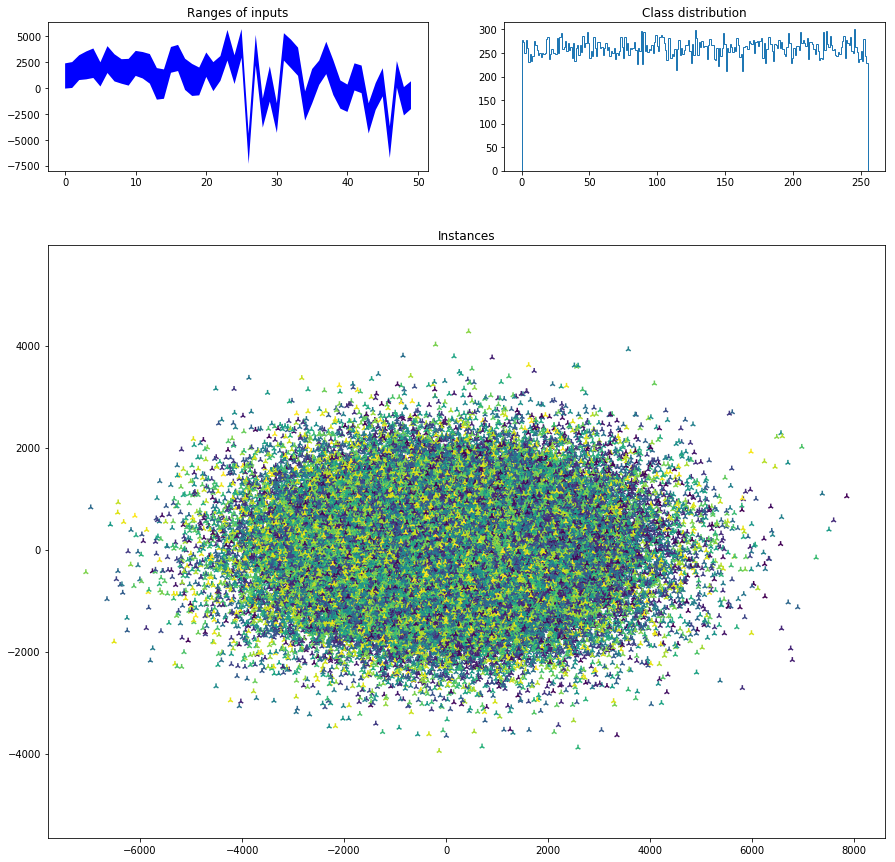

Instances: 66666


In [95]:
f = analyse_dataset(train_x, train_y)

### Test

In [96]:
test_x, test_y = load(noisy_256class_test)

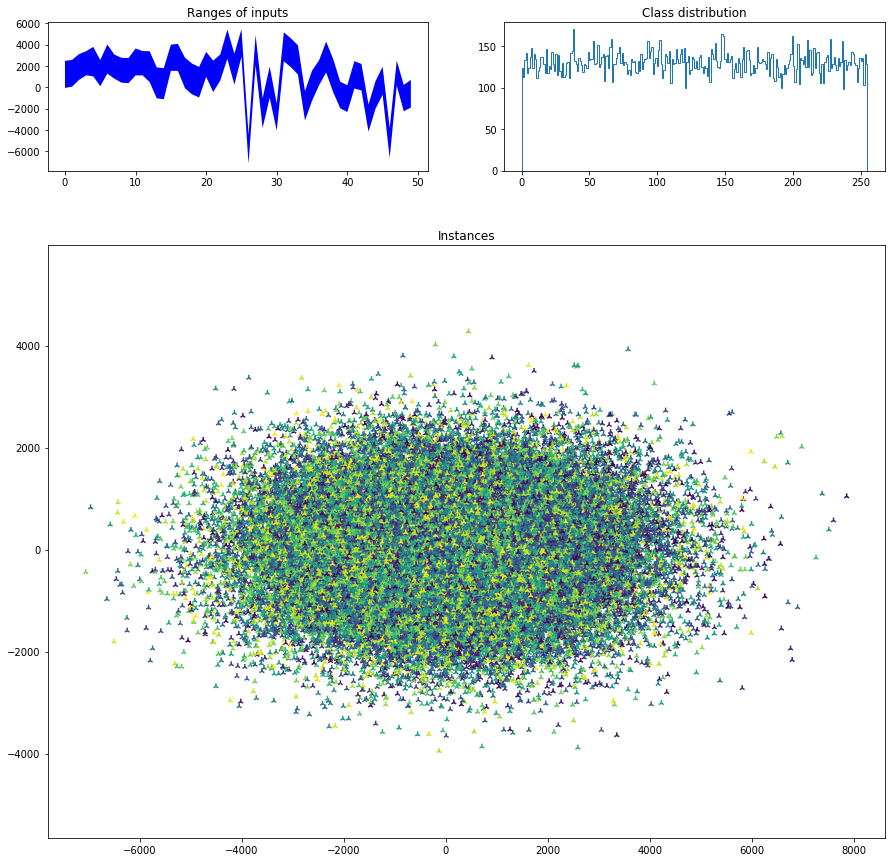

Instances: 33334


In [97]:
f = analyse_dataset(test_x, test_y)

### Joined

In [98]:
X = np.vstack([train_x, test_x])
Y = np.concatenate([train_y, test_y])

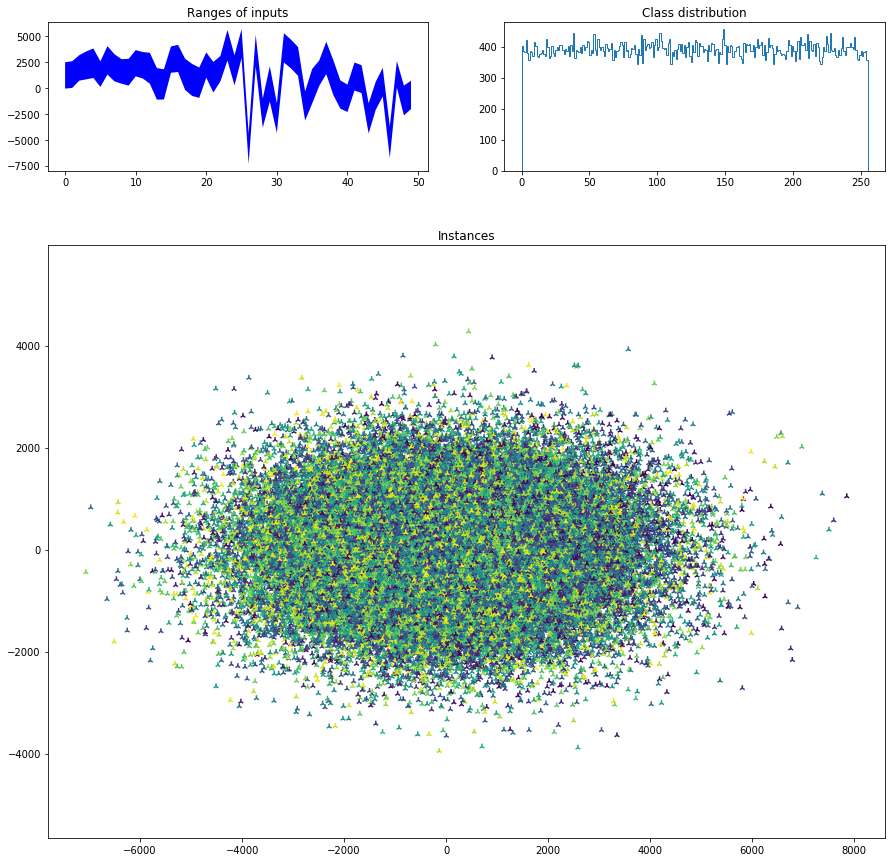

Instances: 100000


In [99]:
f = analyse_dataset(X, Y)

# 4. Preprocessing

## 4.1 How to turn large input values (transformed) to standard decimal format?
**Answer: You divide them all by 1e6!**

The results show some slight numerical differences from the original.

In [100]:
ds_small = "../../res/noiseless_orig/5k/9class/noiseless_9class_5k_test.arff"
ds_large = "../../res/noiseless_orig/5k/9class/noiseless_9class_5k_test_transform.arff"

small_x, small_y = load(ds_small)
large_x, large_y = load(ds_large)

### Original dataset (noiseless, 5k, 9class)

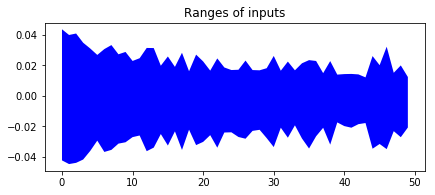

In [101]:
f = analyse_dataset(small_x, small_y, True, False, False)

### So called: "transformed" dataset (noiseless, 5k, 9class)

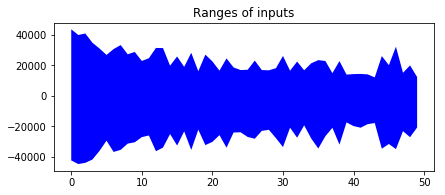

In [102]:
f = analyse_dataset(large_x, large_y, True, False, False)

### Difference from original (numerical error)

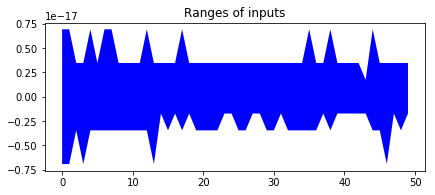

In [103]:
scaled_large_x = large_x * 1e-6        
f = analyse_dataset(scaled_large_x - small_x, small_y, True, False, False)

## 4.2 Effect of standardization on both
To check is it necessary to scale at all.

In [104]:
from sklearn.preprocessing import StandardScaler, scale

small_x, small_y = load(ds_small)
large_x, large_y = load(ds_large)

small_x_sc = scale(small_x)
large_x_sc = scale(large_x)

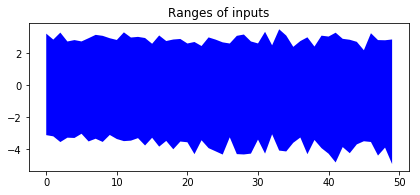

In [105]:
f = analyse_dataset(small_x_sc, small_y, True, False, False)

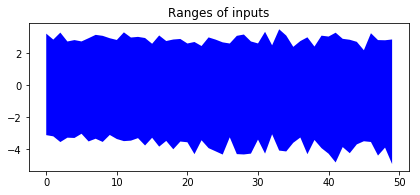

In [106]:
f = analyse_dataset(large_x_sc, large_y, True, False, False)

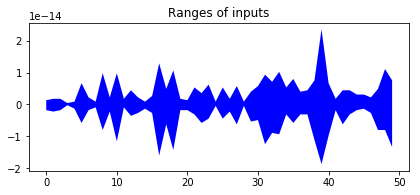

In [107]:
f = analyse_dataset(large_x_sc - small_x_sc, small_y, True, False, False)